In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [4]:

Transaction_data = pd.read_excel("C:/Users/jswat/OneDrive/Desktop/SWATI/Quantium virtual Internship/QVI_transaction_data.xlsx")

In [6]:
Customer_data = pd.read_csv("C:/Users/jswat/OneDrive/Desktop/SWATI/Quantium virtual Internship/QVI_purchase_behaviour.csv")

# Explore the data

In [7]:

Transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
Customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
# Covert Date column into date format
Transaction_data['DATE'] = pd.to_datetime(Transaction_data['DATE'], unit='D', origin='1899-12-30')

In [10]:
# Merging two tables
Store_Data=Transaction_data.merge(Customer_data,how="left",on="LYLTY_CARD_NBR")

In [11]:
Store_Data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [12]:
Store_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [13]:
Store_Data.shape

(264836, 10)

In [14]:
Store_Data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [15]:
#Check for null values
Store_Data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [16]:
#Checking datatypes
Store_Data.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [17]:
#Checking DUPLICATES
Store_Data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Length: 264836, dtype: bool

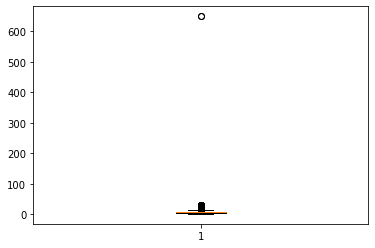

In [18]:
#Checking for outliers
Outlier=plt.boxplot(Store_Data.TOT_SALES)  

In [19]:
[item.get_ydata() [1] for item in Outlier ['whiskers']]

[1.5, 14.8]

In [20]:
y=Store_Data[Store_Data["TOT_SALES"]>500]
y

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [21]:
#Removing outliers that is 2 rows where sales was 650
Store_Data = Store_Data.drop(Store_Data[Store_Data['TOT_SALES'] > 500].index)


In [22]:
#Displyaing unique values of products
unique_values = Store_Data['PROD_NAME'].unique()
print(unique_values)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [23]:
# Filtering out rows where the product name does not contain the word "chip"
filtered_Store_Data = Store_Data[Store_Data['PROD_NAME'].str.contains('chip', case=False, na=False)]
filtered_Store_Data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget


In [24]:
filtered_Store_Data.shape

(74570, 10)

In [25]:
transaction_counts_by_date = filtered_Store_Data.groupby('DATE').size().reset_index(name='Transaction_Count')

print(transaction_counts_by_date)

          DATE  Transaction_Count
0   2018-07-01                167
1   2018-07-02                194
2   2018-07-03                209
3   2018-07-04                182
4   2018-07-05                213
..         ...                ...
359 2019-06-26                192
360 2019-06-27                186
361 2019-06-28                234
362 2019-06-29                212
363 2019-06-30                217

[364 rows x 2 columns]


In [26]:
import re

In [27]:
# Creating pack size column
def extract_pack_size(PROD_NAME):
    match = re.search(r'(\d+g)', PROD_NAME)  # Search for a sequence of digits followed by 'g'
    if match:
        return match.group(0)  # Return the matched string (e.g., '175g')
    else:
        return None  # Return None if no match is found

# Apply the function to create the 'PACK_SIZE' column
filtered_Store_Data['PACK_SIZE'] = filtered_Store_Data['PROD_NAME'].apply(extract_pack_size)

# Display the DataFrame with the new 'PACK_SIZE' column
filtered_Store_Data.head()

C:\Users\jswat\AppData\Local\Temp\ipykernel_8560\2894145059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Store_Data['PACK_SIZE'] = filtered_Store_Data['PROD_NAME'].apply(extract_pack_size)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,330g
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,150g


In [28]:
# Displaying unique value of chips
Chips = filtered_Store_Data['PROD_NAME'].unique()
print(Chips)

['Natural Chip        Compny SeaSalt175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Thins Chips Light&  Tangy 175g'
 'Doritos Corn Chip Southern Chicken 150g'
 'Smiths Chip Thinly  Cut Original 175g'
 'Thins Chips         Originl saltd 175g'
 'Natural ChipCo      Hony Soy Chckn175g'
 'Thins Chips Seasonedchicken 175g' 'Doritos Corn Chips  Original 170g'
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g'
 'Natural Chip Co     Tmato Hrb&Spce 175g'
 'Smiths Crinkle Cut  Chips Original 170g'
 'Cobs Popd Sea Salt  Chips 110g'
 'Smiths Crinkle Cut  Chips Chs&Onion170g'
 'French Fries Potato Chips 175g'
 'Doritos Corn Chips  Cheese Supreme 170g'
 'WW Original Corn    Chips 200g' 'Thins Potato Chips  Hot & Spicy 175g'
 'Cobs Popd Sour Crm  &Chives Chips 110g'
 'Smiths Crnkle Chip  Orgnl Big Bag 380g'
 'Doritos Corn Chips  Nacho Cheese 170g'
 'WW D/Style Chip     Sea Salt 

In [29]:
# Creating Brand Name column
filtered_Store_Data['brand_name'] = filtered_Store_Data['PROD_NAME'].str.split().str[0]


C:\Users\jswat\AppData\Local\Temp\ipykernel_8560\2356812979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Store_Data['brand_name'] = filtered_Store_Data['PROD_NAME'].str.split().str[0]


In [30]:
filtered_Store_Data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,330g,Smiths
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,150g,Doritos


# DATA ANALYSIS FOR CUSTOMER SEGMENTS AND THEIR CHIPS PURCHASING BEHAVIOUR

In [31]:
#Total Sales by LIFESTAGE and PREMIUM_CUSTOMER

sales_by_customer_group = filtered_Store_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
pivot_sales = sales_by_customer_group.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')
pivot_sales

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,9838.3,23950.4,15349.4
NEW FAMILIES,5651.4,4307.1,3087.3
OLDER FAMILIES,44859.2,28298.5,21256.1
OLDER SINGLES/COUPLES,35943.0,35443.2,34545.0
RETIREES,30051.8,40592.1,24804.4
YOUNG FAMILIES,37064.1,25319.5,22781.1
YOUNG SINGLES/COUPLES,16777.1,40069.9,11599.4


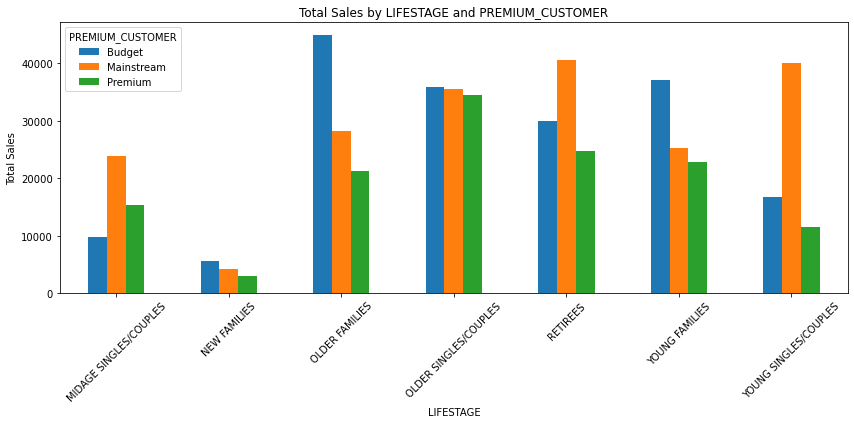

In [32]:
pivot_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

In [33]:
#No of customers by LIFESTAGE and PREMIUM_CUSTOMER
No_of_customer_Group= filtered_Store_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()
pivot_Customers = No_of_customer_Group.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR')
pivot_Customers 

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1473,3333,2298
NEW FAMILIES,840,635,449
OLDER FAMILIES,6539,4112,3131
OLDER SINGLES/COUPLES,5172,5162,4970
RETIREES,4305,5958,3572
YOUNG FAMILIES,5406,3696,3318
YOUNG SINGLES/COUPLES,2708,5643,1850


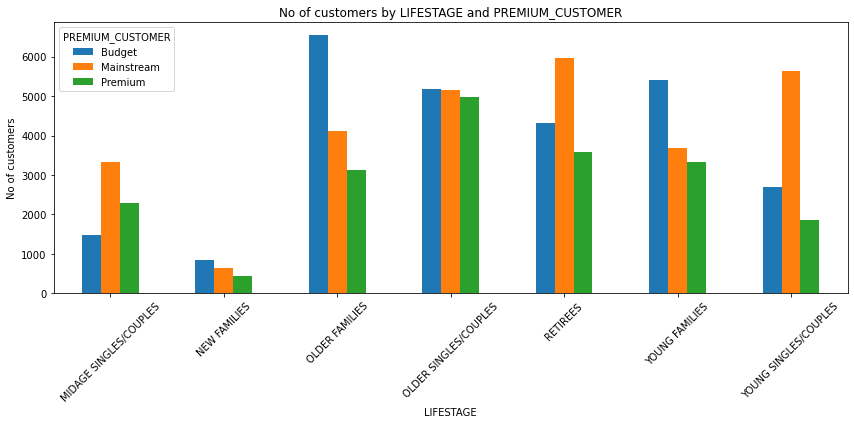

In [34]:
pivot_Customers.plot(kind='bar', figsize=(12, 6))
plt.title('No of customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('No of customers')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

In [35]:
# Group data by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', and calculate total units and number of customers
units_and_customers = filtered_Store_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'PROD_QTY': 'sum', 'LYLTY_CARD_NBR': 'nunique'}).reset_index()

# Calculate average units per customer
units_and_customers['Avg_units_per_customer'] = units_and_customers['PROD_QTY'] / units_and_customers['LYLTY_CARD_NBR']

# Display the result
print(units_and_customers)

                 LIFESTAGE PREMIUM_CUSTOMER  PROD_QTY  LYLTY_CARD_NBR  \
0   MIDAGE SINGLES/COUPLES           Budget      2794             894   
1   MIDAGE SINGLES/COUPLES       Mainstream      6383            1996   
2   MIDAGE SINGLES/COUPLES          Premium      4338            1399   
3             NEW FAMILIES           Budget      1550             581   
4             NEW FAMILIES       Mainstream      1171             444   
5             NEW FAMILIES          Premium       836             316   
6           OLDER FAMILIES           Budget     12703            3177   
7           OLDER FAMILIES       Mainstream      8015            1964   
8           OLDER FAMILIES          Premium      6105            1532   
9    OLDER SINGLES/COUPLES           Budget      9867            3114   
10   OLDER SINGLES/COUPLES       Mainstream      9868            3062   
11   OLDER SINGLES/COUPLES          Premium      9517            2979   
12                RETIREES           Budget      81

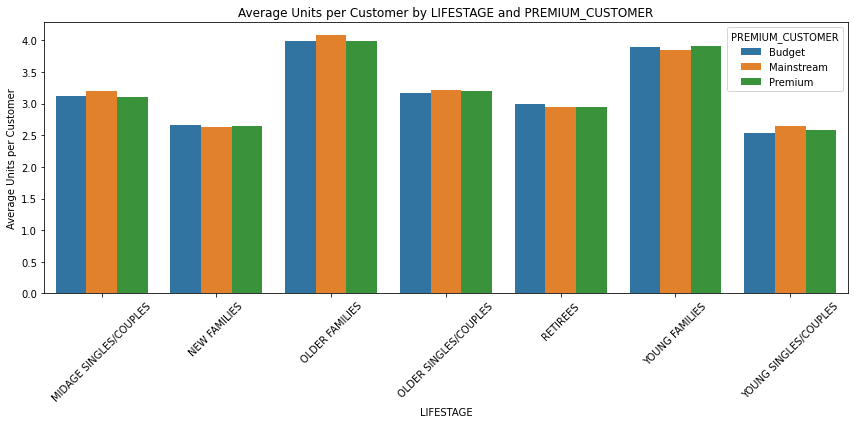

In [36]:
plt.figure(figsize=(12, 6))

# Create a  barplot
sns.barplot(data=units_and_customers, x='LIFESTAGE', y='Avg_units_per_customer', hue='PREMIUM_CUSTOMER')
plt.title('Average Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

In [37]:
# Calculate the total sales for each transaction
filtered_Store_Data['PRICE_PER_UNIT'] = filtered_Store_Data['TOT_SALES'] / filtered_Store_Data['PROD_QTY']

C:\Users\jswat\AppData\Local\Temp\ipykernel_8560\1647085337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Store_Data['PRICE_PER_UNIT'] = filtered_Store_Data['TOT_SALES'] / filtered_Store_Data['PROD_QTY']


In [38]:
avg_price_per_unit = filtered_Store_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()
avg_price_per_unit

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
0,MIDAGE SINGLES/COUPLES,Budget,3.513476
1,MIDAGE SINGLES/COUPLES,Mainstream,3.751905
2,MIDAGE SINGLES/COUPLES,Premium,3.530722
3,NEW FAMILIES,Budget,3.650000
4,NEW FAMILIES,Mainstream,3.658583
5,NEW FAMILIES,Premium,3.672829
6,OLDER FAMILIES,Budget,3.531259
7,OLDER FAMILIES,Mainstream,3.529815
8,OLDER FAMILIES,Premium,3.479080
9,OLDER SINGLES/COUPLES,Budget,3.636717


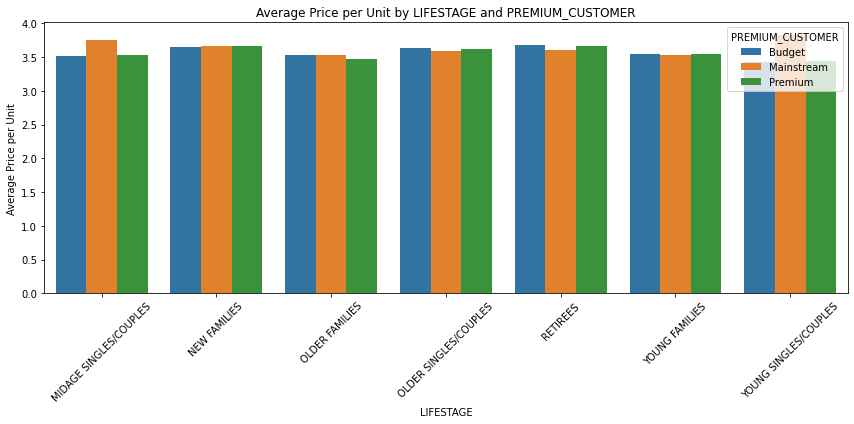

In [39]:

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.


In [41]:
from scipy import stats

In [43]:
# T Test for  between mainstream vs premium and budget midage and young singles and couples
mainstream_Young_unit_price = filtered_Store_Data[(filtered_Store_Data['PREMIUM_CUSTOMER'] == 'Mainstream') & (filtered_Store_Data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['PRICE_PER_UNIT']
premium_budget_midage_unit_price = filtered_Store_Data[(filtered_Store_Data['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget'])) & (filtered_Store_Data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['PRICE_PER_UNIT']

t_stat, p_value = stats.ttest_ind(mainstream_Young_unit_price, premium_budget_midage_unit_price, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 21.91914870170594
P-value: 4.686930308787244e-105


There is a significant difference in the average price per unit between the 'Mainstream' Young Singles/Couples and 'Premium/Budget' Young and Midage Singles/Couples groups


In [44]:
# Filter data for 'Mainstream' Young Singles/Couples
mainstream_young = filtered_Store_Data[(filtered_Store_Data['PREMIUM_CUSTOMER'] == 'Mainstream') & (filtered_Store_Data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

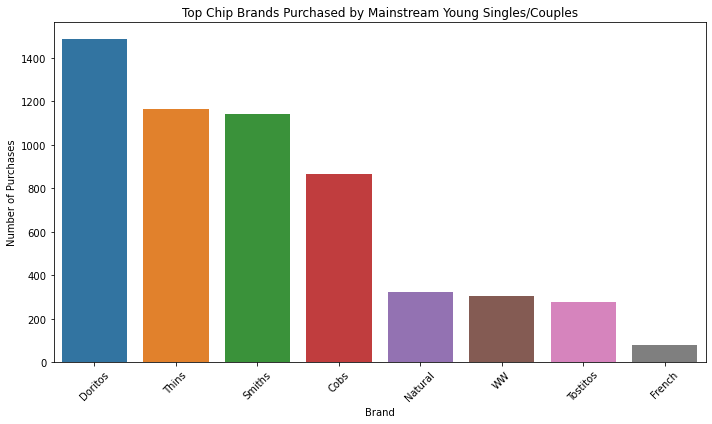

In [45]:
#Top Chip Brands Purchased by Mainstream Young Singles/Couples

brand_counts = mainstream_young['brand_name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Top Chip Brands Purchased by Mainstream Young Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Doritos' popularity is likely due to its strong brand recognition, diverse flavor options, effective marketing, appealing packaging, tasty products, and widespread availability.

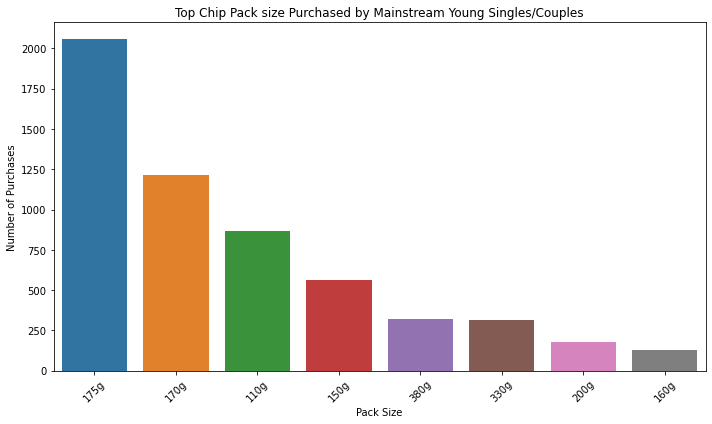

In [46]:
#Top Chip Pack size Purchased by Mainstream Young Singles/Couples

Pack_counts = mainstream_young['PACK_SIZE'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=Pack_counts.index, y=Pack_counts.values)
plt.title('Top Chip Pack size Purchased by Mainstream Young Singles/Couples')
plt.xlabel('Pack Size')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customers may prefer the 175g pack size due to its perceived value for money, convenience, and familiarity.


In [47]:
# Calculate the total sales revenue
total_sales_revenue = filtered_Store_Data['TOT_SALES'].sum()
print("Total Sales Revenue:", total_sales_revenue)

Total Sales Revenue: 511588.2999999999


In [48]:
# Calculate the total number of customers
total_customers = filtered_Store_Data['LYLTY_CARD_NBR'].nunique()
print("Total Number of Customers:", total_customers)

Total Number of Customers: 43625


In [49]:
# Calculate the average number of transactions per customer
total_transactions = filtered_Store_Data['TXN_ID'].count()
total_customers = filtered_Store_Data['LYLTY_CARD_NBR'].nunique()
average_transactions_per_customer = total_transactions / total_customers
print("Average Transactions per Customer:", average_transactions_per_customer)

Average Transactions per Customer: 1.7093409742120345


In [50]:
# Display the total sales revenue for each store
total_sales_revenue = filtered_Store_Data.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
total_sales_revenue.columns = ['STORE_NBR', 'TOT_SALES']
print(total_sales_revenue)

     STORE_NBR  TOT_SALES
0            1      729.0
1            2      580.0
2            3     3062.1
3            4     4003.5
4            5     2501.2
..         ...        ...
260        268      790.9
261        269     3101.6
262        270     3020.2
263        271     2805.1
264        272     1185.9

[265 rows x 2 columns]
